In [21]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [22]:
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [23]:
x_numpy.shape

(100, 1)

In [24]:
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

In [25]:
n_samples, n_features = x.shape
print(f"samples -> {n_samples}, features -> {n_features}")

samples -> 100, features -> 1


In [26]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [27]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epoch -> 0, loss -> 5641.9970703125
epoch -> 10, loss -> 4178.68310546875
epoch -> 20, loss -> 3121.40380859375
epoch -> 30, loss -> 2356.600830078125
epoch -> 40, loss -> 1802.765625
epoch -> 50, loss -> 1401.2991943359375
epoch -> 60, loss -> 1110.0126953125
epoch -> 70, loss -> 898.4857177734375
epoch -> 80, loss -> 744.7574462890625
epoch -> 90, loss -> 632.9527587890625


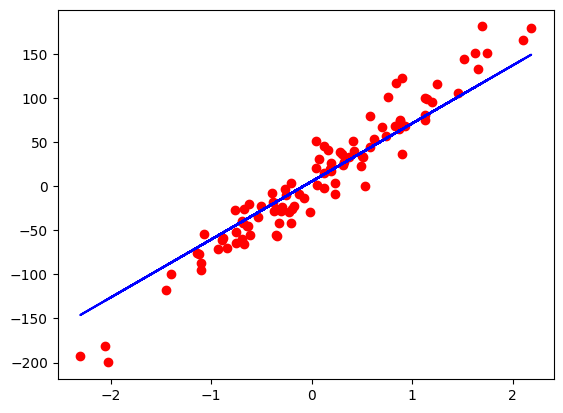

In [28]:
num_epochs = 100
for epoch in range(num_epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    
    loss.backward()
    optimizer.step()

    optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f"epoch -> {epoch}, loss -> {loss.item()}")

predicted = model(x).detach().numpy()

plt.plot(x_numpy, y_numpy, "ro")
plt.plot(x_numpy, predicted, 'b')
plt.show()